<a href="https://colab.research.google.com/github/namoshi/mytest/blob/master/tf_iris_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# pandas for handling our data
import pandas as pd
# matplotlib and seaborn for visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
# numpy for numeric operations
import numpy as np
# tensorflow! our machine learning library
import tensorflow as tf
# train_test_split from sklearn for splitting our data into train and test set
from sklearn.model_selection import train_test_split
# OneHotEncoder from sklearn for converting features and labels to one-hot encoding
from sklearn.preprocessing import OneHotEncoder
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline

In [20]:
import seaborn as sns

df = sns.load_dataset("iris")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
# how many data in each species
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/Users/kurita/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


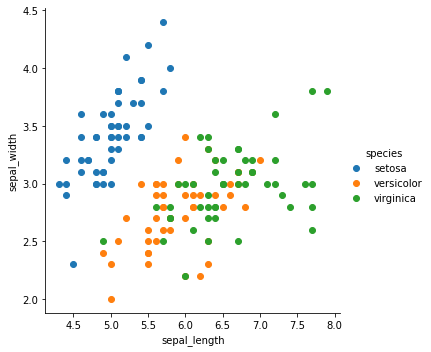

In [26]:
# let's visualize the data with sepalLength and sepalWidth 
sns.FacetGrid(df, hue='species', size=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

In [27]:
# X is our features ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
X = df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y is our labels
y = df.loc[:, ['species']]

In [28]:
# declare OneHotEncoder from sklearn
oneHot = OneHotEncoder()
# fit our X to oneHot encoder 
oneHot.fit(X)
# transform
X = oneHot.transform(X).toarray()
# fit our y to oneHot encoder
oneHot.fit(y)
# transform
y = oneHot.transform(y).toarray()

print("Our features X in one-hot format")
print(X)

Our features X in one-hot format
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# let's split our data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
# let's print shape of each train and testing
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test", y_test.shape)


Shape of X_train:  (135, 123)
Shape of y_train:  (135, 3)
Shape of X_test:  (15, 123)
Shape of y_test (15, 3)


In [30]:
# hyperparameters
learning_rate = 0.0001
num_epochs = 1500
display_step = 1

# for visualize purpose in tensorboard we use tf.name_scope
with tf.name_scope("Declaring_placeholder"):
    # X is placeholdre for iris features. We will feed data later on
    X = tf.placeholder(tf.float32, [None, 15])
    # y is placeholder for iris labels. We will feed data later on
    y = tf.placeholder(tf.float32, [None, 3])
    
with tf.name_scope("Declaring_variables"):
    # W is our weights. This will update during training time
    W = tf.Variable(tf.zeros([15, 3]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([3]))
    
with tf.name_scope("Declaring_functions"):
    # our prediction function
    y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

AttributeError: module 'tensorflow' has no attribute 'placeholder'